<a href="https://colab.research.google.com/github/AndrewRober/BruteForceBestTableFit/blob/master/ConvolutionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from skimage import color

In [ ]:
# Function for applying a convolutional kernel to an image
def convolution2d(image, kernel):
    # Flip the kernel horizontally and vertically
    # (f * g)(t) = ∫ f(τ) g(t - τ) dτ
    # usually in image processing it uses
    # discrete convolutions (replacing integral with sum)
    # However, it's worth noting that in practice, especially in machine
    # learning and convolutional neural networks, the distinction between
    # convolution and correlation can be blurry, and sometimes the terms are
    # used interchangeably. In correlation, the kernel is not flipped,
    # but the operation is otherwise the same. Many deep learning frameworks,
    # such as TensorFlow and PyTorch, implement the correlation operation in
    # their "convolution" layers, mainly because the outcome is the same
    # whether the kernel is learned flipped or not
    kernel = np.flipud(np.fliplr(kernel))
    # Create an output array with the same shape as the input image
    output = np.zeros_like(image)
    # Create a padded version of the input image with a 1-pixel border
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    # Copy the input image into the center of the padded image
    image_padded[1:-1, 1:-1] = image

    # Iterate over the input image, applying the kernel at each position
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x] = np.sum(kernel * image_padded[y:y+3, x:x+3])

    return output

In [ ]:
# Function for normalizing an image to the range [0, 1]
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

In [ ]:
# Function for applying a list of kernels to an image and displaying the results
def apply_kernels(image, kernels):
    num_filters = len(kernels)
    num_columns = 4
    num_rows = math.ceil(num_filters / num_columns)

    fig = plt.figure(figsize=(18, 12))
    for i, kernel in enumerate(kernels):
        # Apply the kernel to the input image
        filtered_image = convolution2d(image, kernel)
        # Normalize the output image
        normalized_image = normalize_image(filtered_image)
        # Display the output image
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(normalized_image, cmap='gray', aspect='auto')
        plt.axis('off')
        plt.title(kernel_names[i])
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

In [ ]:
# Function for applying max pooling to an image
def maxpooling2d(image, pool_size):
    # Create an output array with the pooled dimensions
    output = np.zeros((image.shape[0] // pool_size, image.shape[1] // pool_size))

    # Iterate over the input image, taking the maximum value in each pool
    for y in range(0, image.shape[0], pool_size):
        for x in range(0, image.shape[1], pool_size):
            output[y // pool_size, x // pool_size] = np.max(image[y:y+pool_size, x:x+pool_size])

    return output

<ipython-input-19-b5850bf66552>:41: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face()


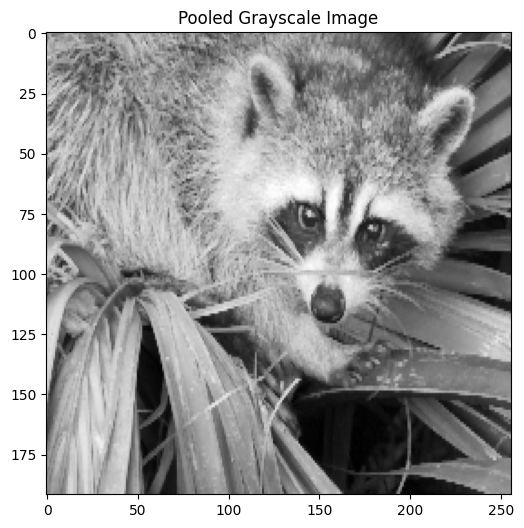

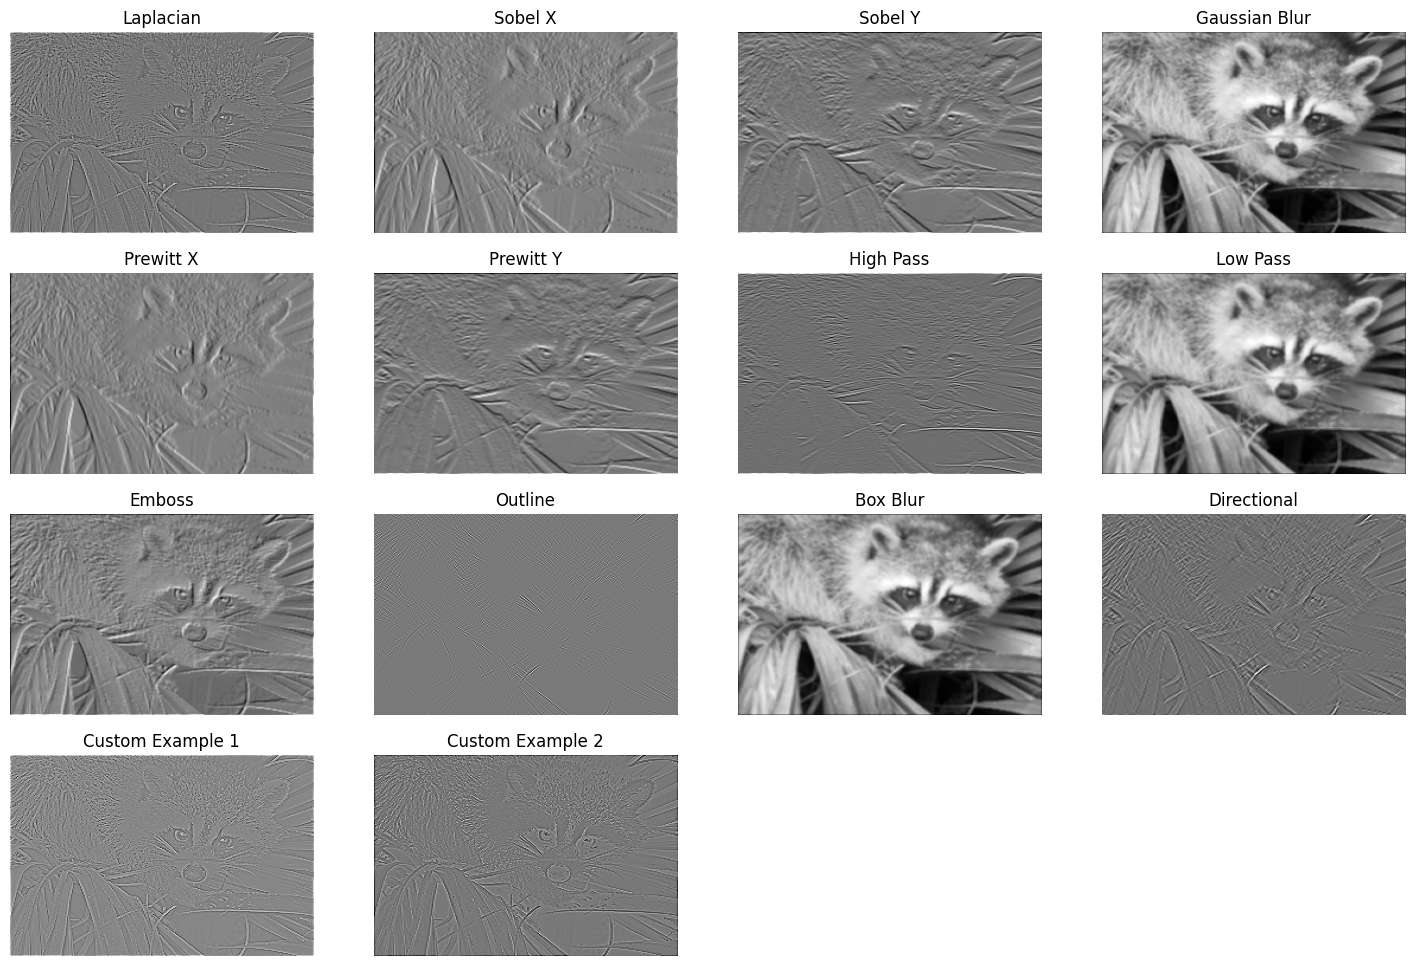

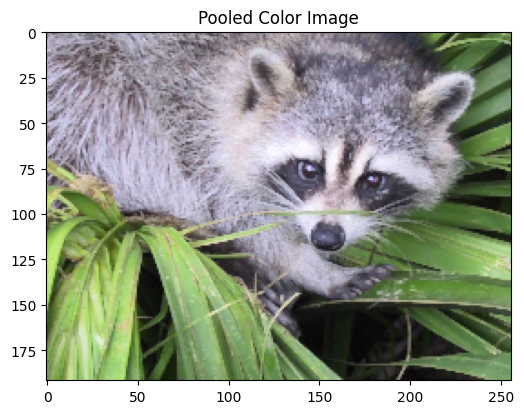

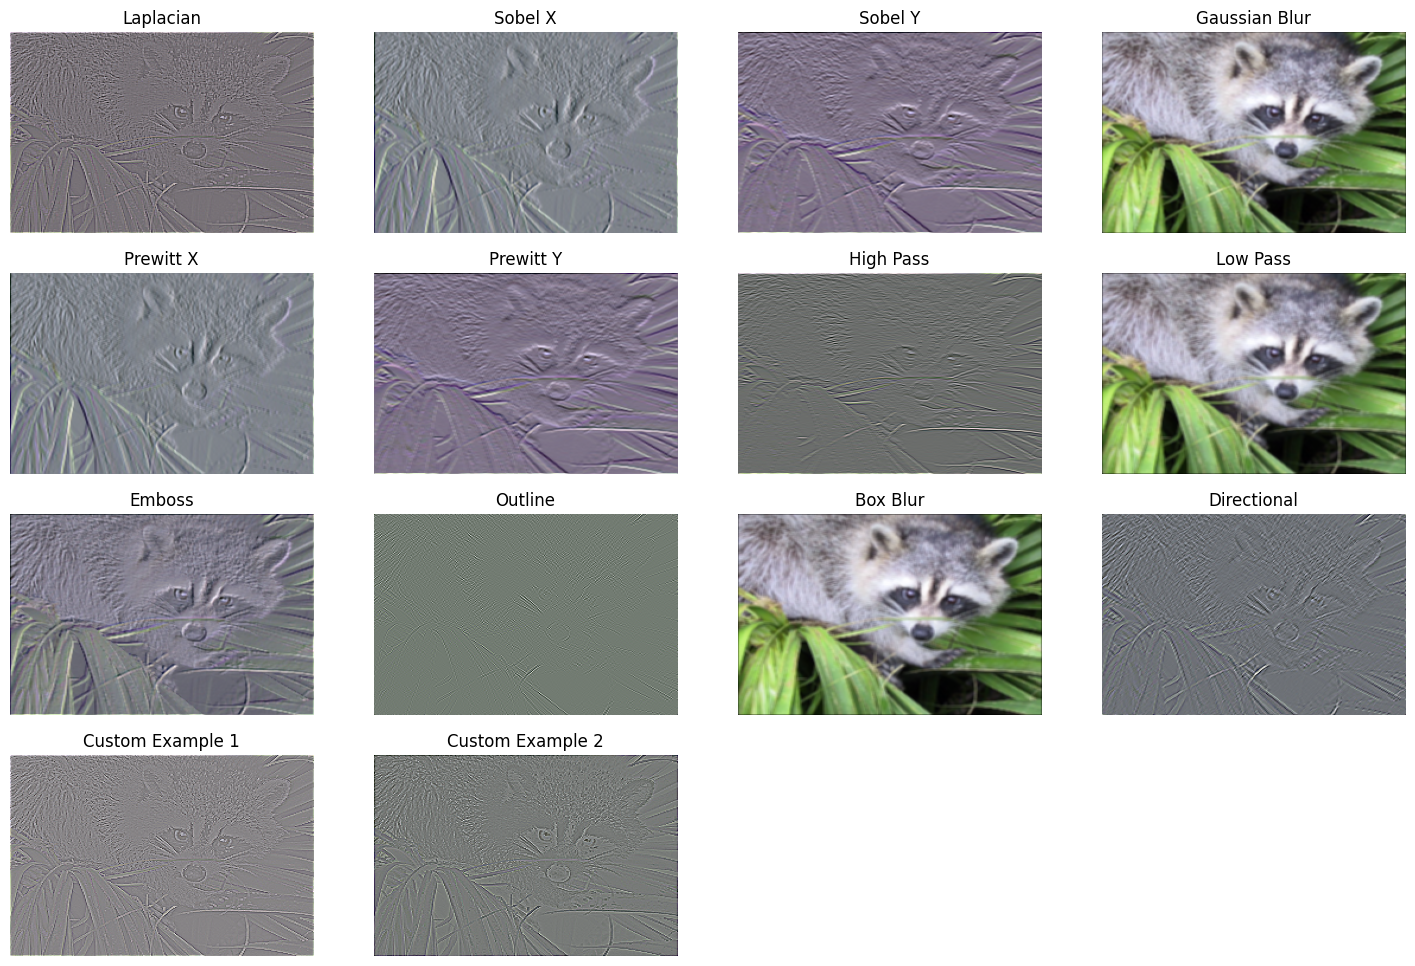

In [19]:
# Load and preprocess the image
face = misc.face()  # Load the built-in face image
gray_face = color.rgb2gray(face)  # Convert the image to grayscale

# Define kernels
kernels = [
    np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),       # Laplacian
    np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),           # Sobel X
    np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),           # Sobel Y
    np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,         # Gaussian Blur
    np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),           # Prewitt X
    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),           # Prewitt Y
    np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]),        # High Pass
    np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9,          # Low Pass
    np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),           # Emboss
    np.array([[-1, 2, -1], [2, -4, 2], [-1, 2, -1]]),         # Outline
    np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9,          # Box Blur
    np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]]),        # Directional
    np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),          # Custom Example 1
    np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),             # Custom Example 2
]

kernel_names = [
    'Laplacian',
    'Sobel X',
    'Sobel Y',
    'Gaussian Blur',
    'Prewitt X',
    'Prewitt Y',
    'High Pass',
    'Low Pass',
    'Emboss',
    'Outline',
    'Box Blur',
    'Directional',
    'Custom Example 1',
    'Custom Example 2',
]

# Apply max pooling to grayscale and color images
pool_size = 4
gray_face_pooled = maxpooling2d(gray_face, pool_size)
face_pooled = np.zeros((face.shape[0] // pool_size, face.shape[1] // pool_size, face.shape[2]))
# Apply max pooling to each color channel separately
for channel in range(3):
    face_pooled[:, :, channel] = maxpooling2d(face[:, :, channel], pool_size)

# Apply kernels to grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_face_pooled, cmap='gray', aspect='auto')
plt.title('Pooled Grayscale Image')
plt.show()
apply_kernels(gray_face_pooled, kernels)

# Function for applying a list of kernels to a color image and displaying the results
def apply_color_kernels(image, kernels):
    num_filters = len(kernels)
    num_columns = 4
    num_rows = math.ceil(num_filters / num_columns)

    # Apply kernels to color channels
    color_filtered_images = []
    for channel in range(3):
        channel_filtered = []
        # Apply the kernel to each channel separately
        for kernel in kernels:
            filtered_channel = convolution2d(image[:, :, channel], kernel)
            normalized_channel = normalize_image(filtered_channel)
            channel_filtered.append(normalized_channel)
        color_filtered_images.append(np.stack(channel_filtered, axis=-1))

    # Stack filtered color channels
    combined_filtered_image = np.stack(color_filtered_images, axis=-1)

    # Display combined filtered color images
    fig = plt.figure(figsize=(18, 12))
    for i in range(num_filters):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(combined_filtered_image[..., i, :], aspect='auto')
        plt.axis('off')
        plt.title(kernel_names[i])
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

# Apply kernels to pooled color image
plt.figure(figsize=(6, 6))
plt.imshow(face_pooled.astype(np.uint8))
plt.title('Pooled Color Image')
plt.show()
apply_color_kernels(face_pooled, kernels)